# **STROJNO UČENJE** 22./23.
# Vježba 07 - K najbližih susjeda (KNN) & K sredina (Kmeans)

Iako sličnih naziva, KNN i Kmeans su različiti algoritmi:

$$
\begin{array}{|c|c|} \hline
  & KNN & Kmeans \\ \hline
\text{vrsta učenja:} & \text{nadzirano} & \text{nenadzirano} \\ \hline
\text{primarni zadatak:} & \text{klasifikacija, regresija} & \text{grupiranje} \\\hline
\text{k =} & \text{broj susjeda} & \text{broj grupa} \\ \hline
\end{array}
$$


**K najbližih susjeda** (eng. [k nearest neighbors](https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/)) je algoritam nadziranog učenja koji se može koristiti i za klasifikaciju i za regresiju.

- Klasifikacija: svakom novom uzorku pridružuje onu klasu koju posjeduje njegovih k najbližih susjednih uzoraka
- Regresija: svakom novom uzorku pridružuje aritmetičku sredinu vrijednosti njegovih k najbližih susjeda

<img src='https://drive.google.com/uc?id=1709J4KGXZWueo0KzCPVl50YIATjLTfXv'>

> **K** označava **broj susjednih uzoraka** koje gledamo za predviđanje novog uzorka.


> Pojam *blizine*, odnosno udaljenosti se definira vrijednošću odabrane metrike, npr. euklidske. Postoje i druge opcije za metriku.


- U slučaju klasifikacije (**nadziranog** učenja), trebaju nam unaprijed poznate klase.
- U slučaju grupiranja (**nenadziranog** učenja), ne trebaju unaprijed poznate klase. Algoritmi grupiranja su rađeni kako bi se moglo pristupiti podacima bez labela i pokušati ih kategorizirati, odnosno klasificirati u *nepoznate* klase.

________________________________________________________________
________________________________________________________________
________________________________________________________________
**K sredina** (eng. [k means](https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca)) je algoritam nenadziranog učenja kojim se podaci pokušavaju razdijeliti, odnosno grupirati (eng. [clustering](https://en.wikipedia.org/wiki/Cluster_analysis)).

Algoritam:
1. nasumično odabrati neke točke kao sredine (k sredina)
2. svakoj točki pridijeliti grupu ovisno o tome koja joj je *najbliža* sredina
3. izračunati nove sredine (sredina svih točaka koji su završili u toj grupi)

... dok se centri ne stabiliziraju.

<img src='https://drive.google.com/uc?id=11s0BdLuTrIOd4VIq03KY9DeHoea2dZPn'>

> **K** označava **broj grupa** na koje dijelimo podatke.


> Sredina u gornjem algoritmu označava *aritmetičku sredinu*. Centar se definira kao nova točka čija je vrijednost aritmetička sredina svih ostalih točaka iz te grupe.


> *Blizina*, odnosno udaljenost između točaka se mjeri euklidskom udaljenošću. Korištenjem drugih metrika, dobivamo druge algoritme. Npr. za $d_1$ (Manhattan) metriku algoritam je *k-medoida*. U slučaju druge metrike, koristi se i drugačija sredina umjesto aritmetičke.

## Klasifikacija

Radimo višeklasnu klasifikaciju na otprije poznatim podacima kako bi se demonstrirala razlika između klasifikacije i grupiranja.

3 klase su vrste pingvina $\in \{$ Adelie, Gentoo, Chinstrap$\}$.

In [22]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/strojno_ucenje_2223/vj_06/penguins_size.csv')

categorical = ['species', 'island', 'sex']
numerical = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# data imputation

data.at[336,'sex'] = data['sex'].mode()[0]

data.loc[data['sex'].isna(), 'sex'] = data['sex'].mode()[0]

for col in numerical:
  data.loc[data[col].isna(), col] = data[col].mean()

Text(0.5, 1.0, 'Culmen Length vs Culmen Depth')

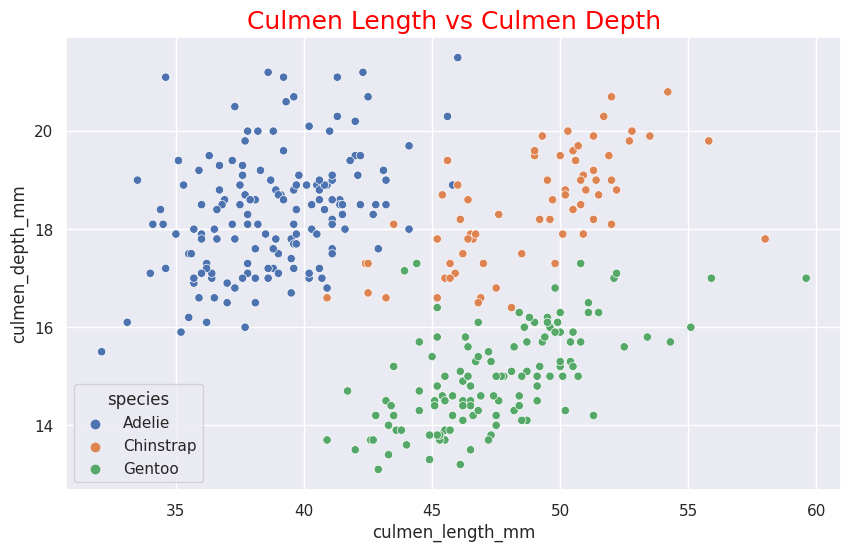

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set(rc = {"figure.figsize": (10,6), "figure.dpi" : 100})

sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", data=data, hue="species")
plt.title("Culmen Length vs Culmen Depth", size=18, color="red")

- Vidimo da se vrste grupiraju - u prostoru razapetom ovim dvjema varijablama su podaci gotovo linearno separabilni => zaključujemo da će ih vjerojatno biti lako klasificirati čak i koristeći samo ove dvije značajke.
- Pogledajmo kako to izgleda u 3D (s još jednom značajkom).

In [3]:
import plotly.express as px

x = data['culmen_length_mm']
y = data['culmen_depth_mm']
z = data['body_mass_g']

fig = px.scatter_3d(data, x='culmen_length_mm', y='culmen_depth_mm', z='body_mass_g',
                    color='species')
fig.show()

In [24]:
# kodiranje kategoričkih varijabli

data['sex'].replace('MALE', 0, inplace=True)
data['sex'].replace('FEMALE', 1, inplace=True)

data['island'].replace('Torgersen', 0, inplace=True)
data['island'].replace('Biscoe', 1, inplace=True)
data['island'].replace('Dream', 2, inplace=True)

data['species'].replace('Adelie', 0, inplace=True)
data['species'].replace('Chinstrap', 1, inplace=True)
data['species'].replace('Gentoo', 2, inplace=True)

In [25]:
# zavisna varijabla = 'species'

y = data['species']
X = data.drop('species', axis=1)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((240, 6), (104, 6))

Skaliramo podatke jer je to [dobra praksa](https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn) za ova dva algoritma.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print('točnost (test): ', accuracy_score(y_pred, y_test))

točnost (test):  0.9903846153846154


In [30]:
print('zadani (default) parametri:\n')
knn.get_params()

zadani (default) parametri:



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

parametri sklearn:

- algorithm = algoritam koji se koristi u pozadini (postoje varijante)
- leaf_size = odnosi se na vrijednost unutar algoritma iz parametra algorithm
- metric = funkcija udaljenosti kojom mjerimo blizinu točaka (minkowski je općeniti zapis euklidske metrike - default vrijednost je euklidska)
- metric_params = potencijalni dodatni parametri za funkciju udaljenosti (ukoliko se koristi neka druga, kompleksnija)
- n_jobs = broj paralelnih procesa kojim se u pozadini izvršava algoritam (vezano uz procesorsku moć)
- n_neighbors = broj susjeda (k)
- p = parametar funkcije udaljenosti (default vrijednost *p = 2* u paru s metrikom *metric = minkowski* rezultira standardnom euklidskom udaljenošću)
- weights = težinska funkcija koja se može primijeniti na susjede pri predikciji. Pri predviđanju klase neke točke sudjeluje k susjeda, ali ne mora se svakog od tih susjeda uzeti u obzir s jednakom važnošću. Npr., možda želimo da se najbliži susjedi "broje više", i u tom slučaju im povećavamo težine.

Kako naći dobar k? Metodom pokušaj-pogreška:

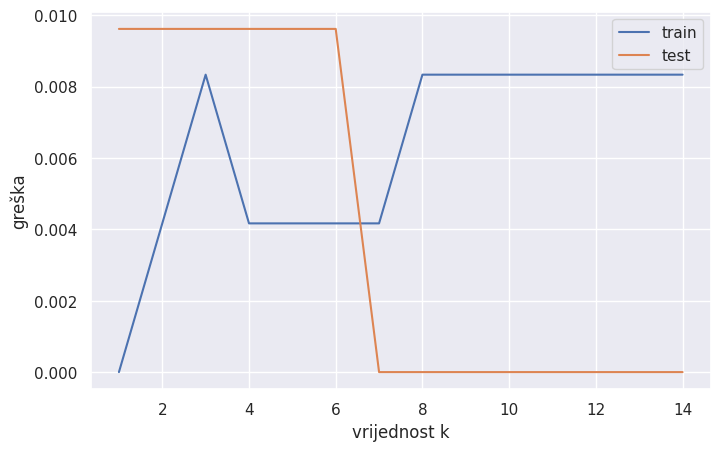

In [31]:
import numpy as np

error1= []
error2= []

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=(8,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('vrijednost k')
plt.ylabel('greška')
plt.legend()

Najsigurnije je pronaći "dobar" k pomoću ovakve metode gdje uzimamo onaj k za koji je greška bila najmanja zato što **parametar k ovisi o podacima!** Ne postoji univerzalna najbolja metoda za pronalaženje parametra k koja ne ovisi o samim podacima (inače bi bila implementirana i ne bismo uopće morali precizirati vrijednost k).

### K-means

Algoritmi nenadziranog učenja su pogodniji za zadatke rudarenja podataka gdje ne postoje unaprijed poznate labele odnosno kategorije podataka.

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) # znamo unaprijed da imamo 3 klase
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [33]:
y_pred = kmeans.predict(X_test)
print('točnost (test): ', accuracy_score(y_pred, y_test))

# ili ručno:
# pogotci = [1 if pred == truth else 0 for pred, truth in zip(y_pred, y_test)]
# print('Točnost: ', sum(pogotci)/len(y_test))

točnost (test):  0.19230769230769232


- Kako izmjeriti kvalitetu modela? [Metrike za grupiranje](https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6) su nešto drugačije od metrika koje smo vidjeli dosada.
- Mi ovdje koristimo omeđenu metriku - tzv. **siluetu** (eng. [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) koja poprima vrijednosti unutar $\left[ -1, 1\right]$ gdje je bolji što veći broj.

> Sjetimo se: odozgo *neomeđene* metrike koje smo vidjeli su RMSE, MSE, MAE $\left[ 0, \infty \right>$. *Omeđena* metrika koju smo vidjeli je npr. točnost $\in \left[ 0, 1\right]$.

In [34]:
from sklearn.metrics import silhouette_score

print('silueta: ', silhouette_score(X_test, y_test))

silueta:  0.32080412883972553


In [40]:
X1 = data[['flipper_length_mm', 'culmen_length_mm']].to_numpy()
y1 = data['species'].to_numpy()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.fit_transform(X_test1)

kmeans = KMeans(n_clusters=3) # znamo unaprijed da imamo 3 klase
kmeans.fit(X_train1)

print('silueta: ', silhouette_score(X_test1, y_test1)) # bolje!!

silueta:  0.46767057807174367


Kako to?

Jer su ovi podaci takvi.

Lakše je definirati 3 grupe (klastera) u dvodimenzionalnom prostoru (određenom ovim dvjema značajkama), nego u višedimenzionalnom prostoru za ove podatke! Možda su u 6 dimenzija naši podaci predaleko jedni od drugih, ili su raspoređeni tako da je teško razdvojiti grupe (sve udaljenosti su slične), itd. Pojava smetnje višedimenzionalnosti podataka (puno značajki) pri učenju algoritama se naziva [kletva dimenzionalnosti](https://en.wikipedia.org/wiki/Curse_of_dimensionality#:~:text=The%20curse%20of%20dimensionality%20refers%20to%20various%20phenomena,E.%20Bellman%20when%20considering%20problems%20in%20dynamic%20programming.).

In [37]:
print(f"X_test sadrži točke u {X_test.shape[1]} dimenzija")

X_test sadrži točke u 6 dimenzija


## Regresija

Predviđamo vrijednost varijable *flipper_length_mm* pomoću ostalih značajki.

<img src='https://drive.google.com/uc?id=12bHMHIFiGvxOw83k0GiaIvzw2ly1eFJw' width='60%'>

In [41]:
# zavisna varijabla = 'flipper_length_mm'

y = data['flipper_length_mm']
X = data.drop('flipper_length_mm', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knn_regr = KNeighborsRegressor() # default: n_neighbors = 5
knn_regr.fit(X_train, y_train)

KNeighborsRegressor()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = knn_regr.predict(X_test)
print(f"test RMSE = {np.sqrt(mean_squared_error(y_pred, y_test))}")
print(f"test MAE = {mean_absolute_error(y_pred, y_test)}")

test RMSE = 5.438600815821615
test MAE = 4.274836932073775


In [47]:
print(f"minimum = {y_test.describe()['min']}, maksimum = {y_test.describe()['max']}")

minimum = 174.0, maksimum = 224.0


Zaključujemo da je greška mala s obzirom na raspon podataka.